In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score,plot_roc_curve

https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci

In [2]:
df=pd.read_csv("heart-disease.csv")
print(df.head())

print(f"null count in all columns:{df.isnull().sum().transpose()}")


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
null count in all columns:age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB



 value counts in target   :
1    165
0    138
Name: target, dtype: int64
      
              
              
              
plot of value counts in target:
               AxesSubplot(0.125,0.125;0.775x0.755);
      
      


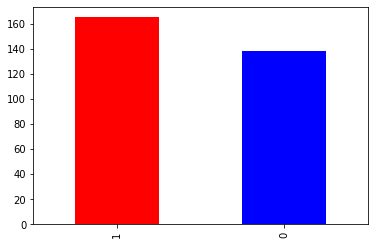

In [4]:
print(f"""
 value counts in target   :
{df['target'].value_counts()}
      
              
              
              
plot of value counts in target:
               {df['target'].value_counts().plot(kind='bar',color=["red","blue"])};
      
      """)


In [5]:
df.sex.value_counts()  #more males

1    207
0     96
Name: sex, dtype: int64

sex      0    1
target         
0       24  114
1       72   93


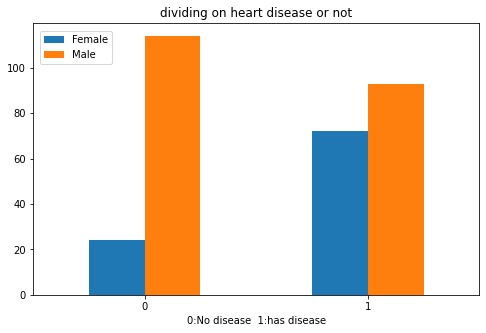

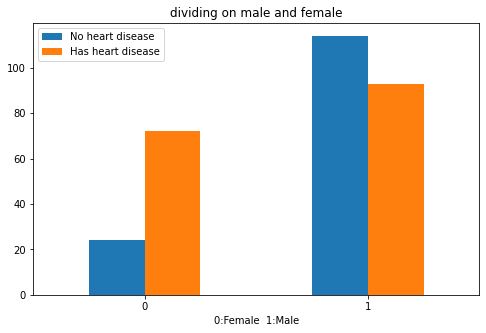

In [21]:
#Compare target to sex
print(pd.crosstab(df.target,df.sex))
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(8,5),rot=0).set(title="dividing on heart disease or not",xlabel="0:No disease  1:has disease");
plt.legend(['Female','Male'],loc=(0.015,0.85))
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(8,5),rot=0).set(title="dividing on male and female",xlabel="0:Female  1:Male");
plt.legend(['No heart disease','Has heart disease']);


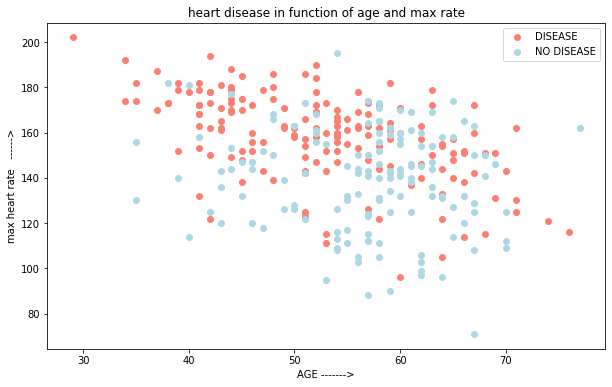

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c='salmon');  #downward trend
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c='lightblue');
plt.legend(['DISEASE','NO DISEASE'])
plt.title("heart disease in function of age and max rate")
plt.xlabel("AGE ------->")
plt.ylabel("max heart rate   ------>");

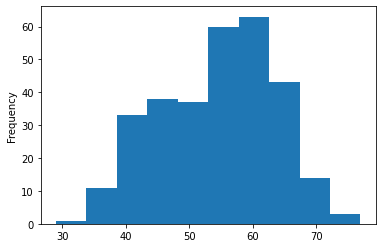

In [8]:
df.age.plot(kind='hist');   #negative skewed. Mean--->median---> mode

cp - chest pain type
- 0: Typical angina: chest pain related decrease blood supply to the heart
- 1: Atypical angina: chest pain not related to heart
- 2: Non-anginal pain: typically esophageal spasms (non heart related)
- 3: Asymptomatic: chest pain not showing signs of diseases

exang - exercise induced angina (pain). 

In [9]:
print("weird data, \n1 pain related to heart (0). yet less heart disease \n2. pain not related to heart(1,2,3),more heart issues.  ")
pd.crosstab(df.cp,df.target)


weird data, 
1 pain related to heart (0). yet less heart disease 
2. pain not related to heart(1,2,3),more heart issues.  


target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


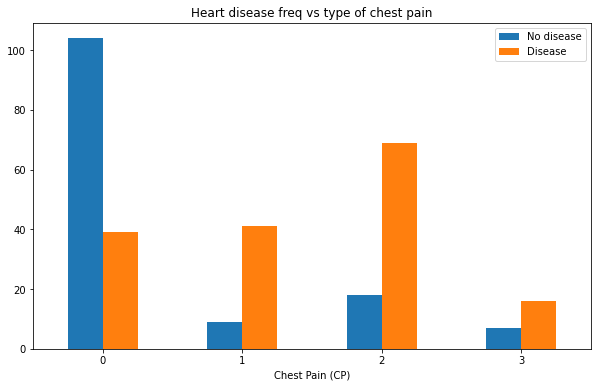

In [10]:
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(10,6),rot=0).set(xlabel="Chest Pain (CP)",title="Heart disease freq vs type of chest pain")
plt.legend(['No disease','Disease']);

In [22]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


#### Making correlation matrix prettier

(14.5, -0.5)

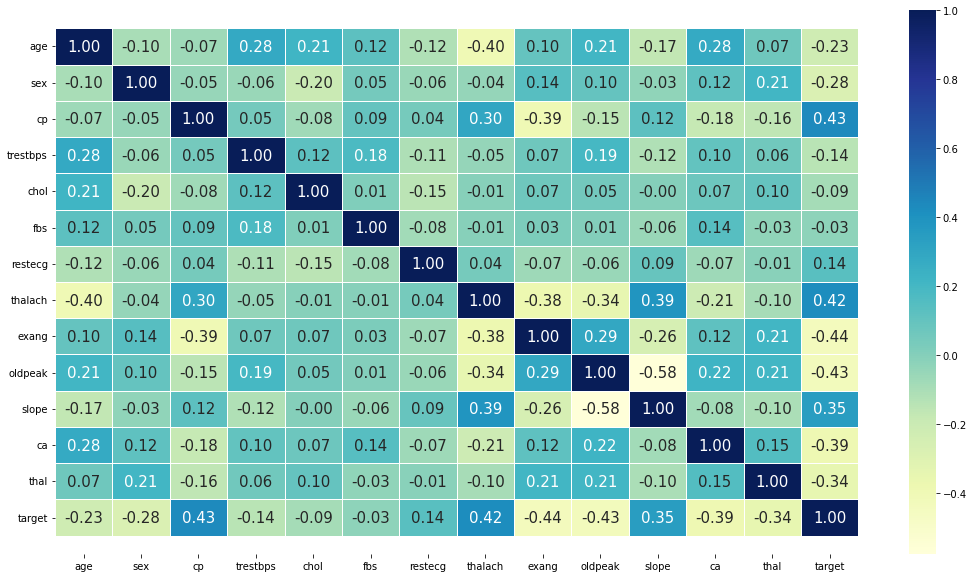

In [35]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(18,10))
ax=sns.heatmap(corr_matrix,annot=True,fmt='.2f',cmap='YlGnBu',lw=0.5,annot_kws={'size': 15})  #annot means we wanna annotate it
plt.yticks(rotation=0)
# in the video, ylin was surpassing , numbers coming out of the box 
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)   #no effect here

* exang goes down (1- pain, 0-no pain), target goes up(1 has hd, 0-no hd). Weird. 

#### Model related EDA. Let machine tell which collumns affects it more. 

In [66]:
X=df.drop('target',axis=1)
y=df['target']
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
X_train.shape

(242, 13)

We will try 3 different ML model-
1. Logistic Regression
2. K- nearest neighbour
3. Random Forest classfier

We will use pipelines, so put models in a dictionary
 

In [68]:
models = {"KNN": KNeighborsClassifier(),"Logistic Regression": LogisticRegression(),"Random Forest": RandomForestClassifier()}
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluates a given ML models (in a dict {name of model:model})
    X_train:traning data(no labels)
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    np.random.seed(42)
    model_scores={}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)
    return model_scores
model_score=fit_and_score(models,X_train,X_test,y_train,y_test)
model_score

c:\Users\Sarkar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.5737704918032787,
 'Logistic Regression': 0.7704918032786885,
 'Random Forest': 0.7540983606557377}

              KNN  Logistic Regression  Random Forest
Accuracy  0.57377             0.770492       0.754098


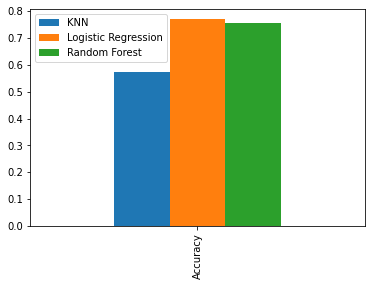

In [79]:
score_df=pd.DataFrame(model_score,index=['Accuracy'])
print(score_df)
score_df.plot.bar();

                     Accuracy
KNN                  0.573770
Logistic Regression  0.770492
Random Forest        0.754098


<AxesSubplot:>

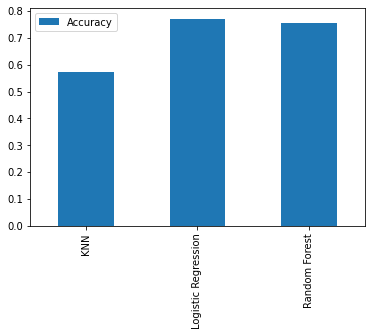

In [80]:
print(score_df.T)
score_df.T.plot.bar()

<AxesSubplot:>

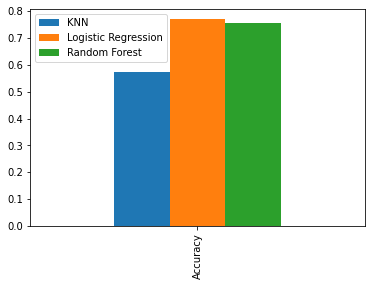

In [76]:
score_df.plot.bar()

#### Now we got baseline model, and we should improve it
- Let's briefly go through each before we see them in action.

1. Hyperparameter tuning - Each model you use has a series of dials you can turn to dictate how they perform. Changing these values may increase or decrease model performance.
2.  Feature importance - If there are a large amount of features we're using to make predictions, do some have more importance than others? For example, for predicting heart disease, which is more important, sex or age?
3. Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).
4. Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part and evaluates performance as an average.
5. Precision - Proportion of true positives over total number of samples. Higher precision leads to less false positives.
6. Recall - Proportion of true positives over total number of true positives and false negatives. Higher recall leads to less false negatives.
7. F1 score - Combines precision and recall into one metric. 1 is best, 0 is worst.
8. Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.
9. ROC Curve - Receiver Operating Characterisitc is a plot of true positive rate versus false positive rate.
10. Area Under Curve (AUC) - The area underneath the ROC curve. A perfect model achieves a score of 1.0.




Lets tune KNN

In [90]:
train_scores=[]
test_scores=[]

#Create list of different n-neighbours
neighbors=range(1,21) #default is 5

#Setup KNN instance
knn=KNeighborsClassifier()

#One can adjust parameters by using model.set_params()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))


In [91]:
train_scores

[1.0,
 0.8264462809917356,
 0.7933884297520661,
 0.7975206611570248,
 0.7768595041322314,
 0.78099173553719,
 0.756198347107438,
 0.743801652892562,
 0.7231404958677686,
 0.731404958677686,
 0.731404958677686,
 0.7231404958677686,
 0.7148760330578512,
 0.7066115702479339,
 0.7107438016528925,
 0.71900826446281,
 0.6942148760330579,
 0.6983471074380165,
 0.7107438016528925,
 0.7107438016528925]

In [92]:
test_scores

[0.4918032786885246,
 0.4918032786885246,
 0.5737704918032787,
 0.5409836065573771,
 0.5737704918032787,
 0.5737704918032787,
 0.5737704918032787,
 0.5901639344262295,
 0.5901639344262295,
 0.5737704918032787,
 0.5737704918032787,
 0.5737704918032787,
 0.5737704918032787,
 0.5737704918032787,
 0.6229508196721312,
 0.6229508196721312,
 0.6065573770491803,
 0.639344262295082,
 0.6065573770491803,
 0.6229508196721312]

Maximum KNN score on the test data: 63.93%


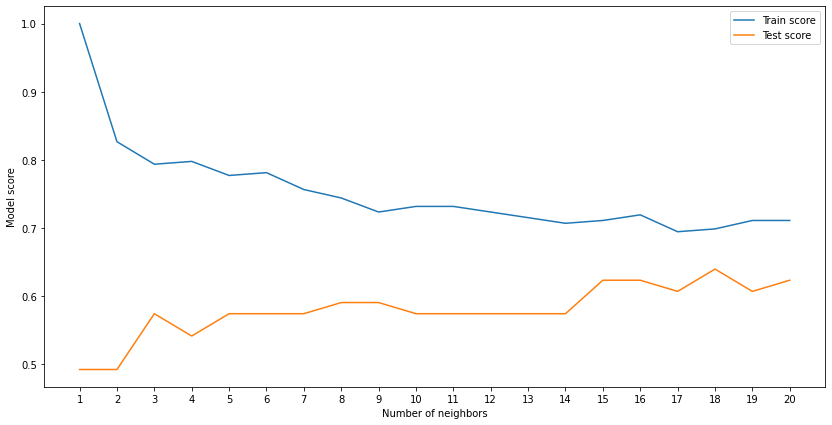

In [93]:
plt.figure(figsize=(14,7))
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

KNN is nowhere near Logistic regress or randomforest. So, drop. <br>
Also, we did tuning by hand. Nowwe use RandomizedSearchCV

In [103]:
#Create hyperparameter grid for logistic regression
log_reg_grid = {"C": np.logspace(-4, 4, 20),"solver": ["liblinear"]}
#create hyperparameter grid for random forest classifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),"max_depth": [None, 3, 5, 10],"min_samples_split": np.arange(2, 20, 2),"min_samples_leaf": np.arange(1, 20, 2)}

we got hyperparameters model, not lets tune then using randomizedsearchCV,tune them up

In [155]:
rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)  #n_iter means, 20 combinations only
rs_log_reg.fit(X_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 1.26260011e-04, 1.59415904e-04, 2.01278538e-04,
       2.54134304e-04, 3.20870000e-04, 4.05130497e-04, 5.11517810e-04,
       6.45842443e-04, 8.15440740e-04, 1.02957557e-03, 1.29994222e-03,
       1.64130720e-03, 2.07231465e-03, 2.61650470e-03, 3.30359912e-03,
       4.17112461e-0...
       4.68690419e+01, 5.91768575e+01, 7.47167068e+01, 9.43373222e+01,
       1.19110313e+02, 1.50388695e+02, 1.89880782e+02, 2.39743497e+02,
       3.02700165e+02, 3.82189262e+02, 4.82552204e+02, 6.09270466e+02,
       7.69264957e+02, 9.71274020e+02, 1.22633068e+03, 1.54836526e+03,
       1.95496614e+03, 2.46834047e+03, 3.11652694e+03, 3.93492726e+03,
       4.96823959e+03, 6.27289986e+03, 7.92016405e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [156]:
rs_log_reg.score(X_train,y_train)

0.8471074380165289

Now we have tuned logistic regression, do same from randomforestclassifier

In [116]:
rs_rf=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=True)
rs_rf.fit(X_test,y_test)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [117]:
rs_rf.best_params_

{'n_estimators': 960,
 'min_samples_split': 8,
 'min_samples_leaf': 11,
 'max_depth': 3}

In [118]:
rs_rf.score(X_test,y_test)

0.8688524590163934

#### Tune hyperparameters of our logistic regression using gridsearchCV, since they are better

In [160]:
log_reg_grid={"C": np.logspace(-4, 4, 30),"solver": ["liblinear"]}
gs_log_reg=GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)
gs_log_reg.fit(X_train,y_train)
gs_log_reg.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [161]:
gs_log_reg.score(X_test,y_test)

0.7704918032786885

### going beyond accuracy <br>
We want:

1. ROC curve and AUC score - plot_roc_curve()
2. Confusion matrix - confusion_matrix()
3. Classification report - classification_report()
4. Precision - precision_score()
5. Recall - recall_score()
6. F1-score - f1_score()

c:\Users\Sarkar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


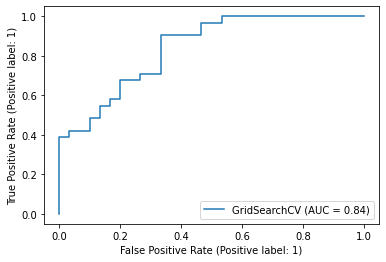

In [164]:
y_pred=gs_log_reg.predict(X_test)
plot_roc_curve(gs_log_reg,X_test,y_test)

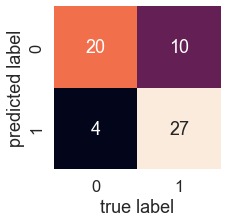

In [167]:
sns.set(font_scale =1.5)
def plot_conf_mat(y_test,y_pred):
    fig,ax=plt.subplots(figsize =(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cbar=False)
    plt.xlabel('true label')
    plt.ylabel('predicted label')
plot_conf_mat(y_test,y_pred)

lets get classification report, `cross-validiated`precision report,recall and f1 score

In [169]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.67      0.74        30
           1       0.73      0.87      0.79        31

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



#### calculate evaluation matrix usng cross-validiation

In [170]:
#check best hyperparameter
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [181]:
clf=LogisticRegression(C=0.38566204211634725,solver='liblinear')
cv_acc=cross_val_score(clf,X,y,cv=5,scoring='accuracy')
print(cv_acc)
cv_acc=np.mean(cv_acc)
cv_acc

[0.81967213 0.8852459  0.86885246 0.86666667 0.75      ]


0.8380874316939891

In [182]:
cv_precision=cross_val_score(clf,X,y,cv=5,scoring='precision')
print(cv_precision)
cv_precision=np.mean(cv_precision)
cv_precision

[0.775      0.88235294 0.85714286 0.83783784 0.725     ]


0.8154667272314331

In [184]:
cv_f1=cross_val_score(clf,X,y,cv=5,scoring='f1')
print(cv_f1)
cv_f1=np.mean(cv_f1)
cv_f1

[0.84931507 0.89552239 0.88235294 0.88571429 0.79452055]


0.8614850462777628

In [185]:
cv_recall=cross_val_score(clf,X,y,cv=5,scoring='recall')
print(cv_recall)
cv_recall=np.mean(cv_recall)
cv_recall

[0.93939394 0.90909091 0.90909091 0.93939394 0.87878788]


0.9151515151515153

Visualize cross validiated matrix

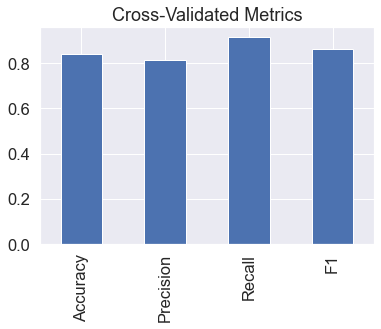

In [186]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

### Feature importance is asking which feature contributes most to output

In [188]:
clf=LogisticRegression(C=0.38566204211634725,solver='liblinear')
clf.fit(X_train,y_train)
clf.coef_

array([[-0.00159735, -1.39593451,  0.92734592, -0.02018937, -0.00269665,
         0.06814245,  0.5155538 ,  0.03413803, -0.72024756, -0.59529222,
         0.19052503, -0.59478689, -0.36218156]])

In [189]:
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': -0.0015973474916836756,
 'sex': -1.395934512718097,
 'cp': 0.9273459211430414,
 'trestbps': -0.020189369551024367,
 'chol': -0.002696646353281579,
 'fbs': 0.06814244831214201,
 'restecg': 0.5155538003994311,
 'thalach': 0.034138031246060026,
 'exang': -0.7202475579718095,
 'oldpeak': -0.5952922206798473,
 'slope': 0.1905250262822202,
 'ca': -0.5947868903635214,
 'thal': -0.36218155853847517}

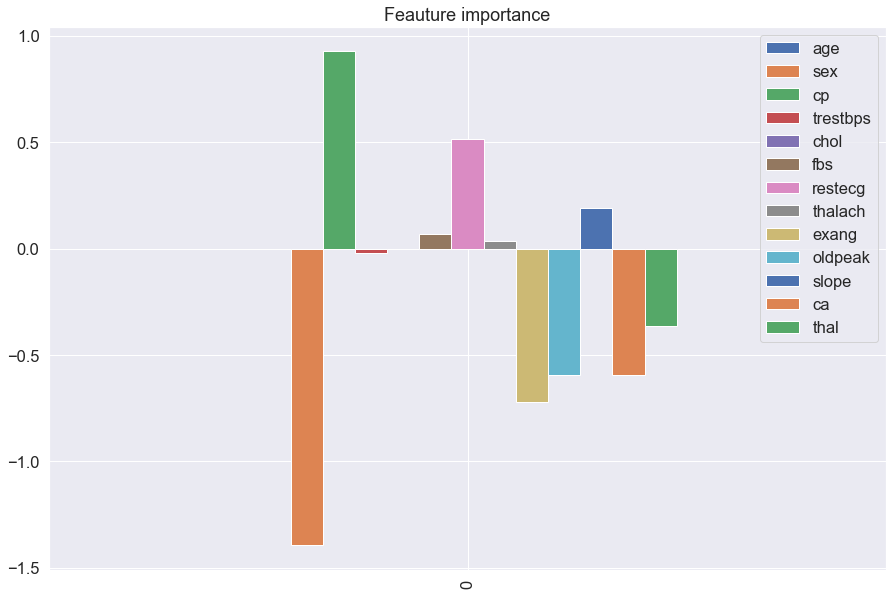

In [194]:
feature_df=pd.DataFrame(features_dict,index=[0])
feature_df.plot.bar(title='Feauture importance',legend=True,figsize=(15,10));

<AxesSubplot:title={'center':'Feauture importance'}>

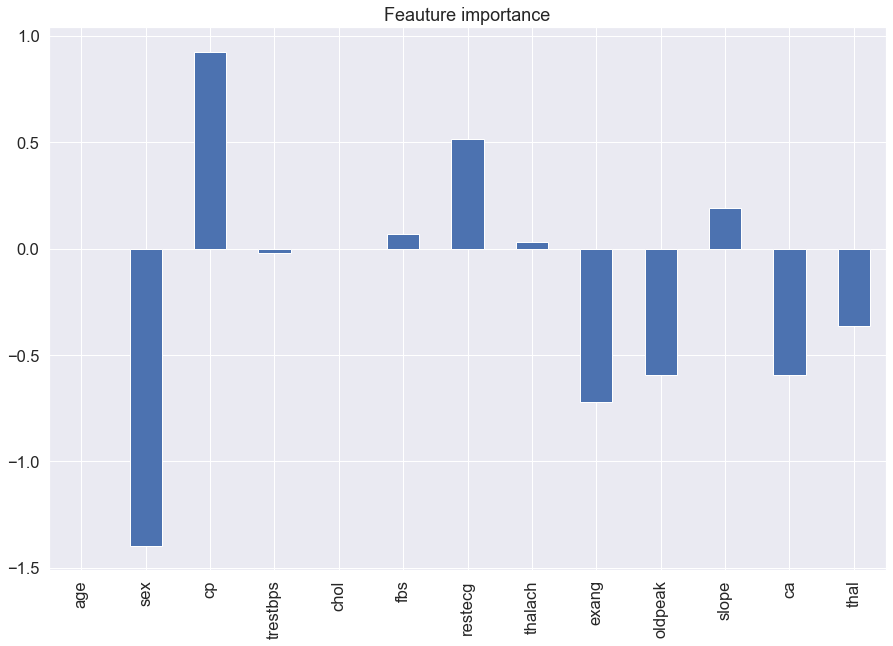

In [195]:
feature_df.T.plot.bar(title='Feauture importance',legend=False,figsize=(15,10))